# Fundamentos Completos de Tensores en PyTorch






## Contenido Completo

### Parte 1: Introducción a Tensores
1. Tensores 0D: Escalares
2. Tensores 1D: Vectores
3. Tensores 2D: Matrices
4. Tensores 3D: Cubos de datos
5. Tensores 4D+: Hipercubos

### Parte 2: Propiedades y Operaciones 
6. **shape**, **size()**, **numel()**
7. **reshape()**, **view()**, **flatten()**
8. **squeeze()**, **unsqueeze()**
9. **item()** - Extraer valores
10. **transpose()**, **permute()**

### Parte 3: Operaciones Matemáticas 
11. Operaciones element-wise (+, -, *, /, **)
12. Operaciones matriciales (@, matmul, dot)
13. Broadcasting en detalle
14. Reducción (sum, mean, max, min)
15. Concatenación (cat, stack)

### Parte 4: Datasets y DataLoaders 
16. **Dataset** base de PyTorch
17. Custom Dataset con **herencia**
18. **Transformaciones** de datos
19. **DataLoader** y batching
20. Pipeline completo de datos

###  Parte 5: Visualizaciones 
21. Gráficos fijos con Matplotlib
22. Visualizaciones interactivas
23. Interpretación de shapes



# instalacion de cude y torchvision
# https://developer.nvidia.com/cuda/toolkit
#
# uv pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu128

In [50]:
# Configuración del entorno y librerías
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split, Subset
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 12
%matplotlib inline

# Verificar PyTorch

print("CONFIGURACIÓN DEL ENTORNO:")

print(f"PyTorch: {torch.__version__}")
print(f"CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Reproducibilidad
torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")


CONFIGURACIÓN DEL ENTORNO:
PyTorch: 2.2.1+cu121
CUDA disponible: True
GPU: NVIDIA GeForce RTX 3050 Laptop GPU
Device: cuda


In [23]:
# En Colab esto suele funcionar. En VSCode/Windows puede no existir nvidia-smi si no tienes driver NVIDIA instalado.
!nvidia-smi

Wed Jan 28 11:16:46 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              9W /   49W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1️⃣ TENSORES 0D: ESCALARES

Un **escalar** es un tensor de 0 dimensiones que contiene un solo valor.

### 🎯 Características:
- `ndim = 0` (sin dimensiones)
- `shape = torch.Size([])`  (shape vacío)
- Usa `.item()` para extraer el valor de Python

### 💡 Casos de Uso:
- Valores de pérdida (loss)
- Learning rate
- Accuracy
- Cualquier métrica única

---

In [10]:
# ============================================================================
# TENSORES 0D - ESCALARES
# ============================================================================

# Crear escalares
escalar_int = torch.tensor(42)
escalar_float = torch.tensor(3.14159)
escalar_bool = torch.tensor(True)

print("📍 TENSORES 0D: ESCALARES")
print("\/"*80)

# Inspeccionar propiedades
print(f"\n 1). Escalar entero: {escalar_int}")
print(f"   .ndim: {escalar_int.ndim}")
print(f"   .shape: {escalar_int.shape}")
print(f"   .dtype: {escalar_int.dtype}")
print(f"   .item(): {escalar_int.item()} (tipo Python: {type(escalar_int.item())})")

print(f"\n 2). Escalar float: {escalar_float}")
print(f"   .ndim: {escalar_float.ndim}")
print(f"   .shape: {escalar_float.shape}")
print(f"   .item(): {escalar_float.item()}")


print(f"\n 3). Booleano: {escalar_bool}")
print(f"   .ndim: {escalar_bool.ndim}")
print(f"   .shape: {escalar_bool.shape}")
print(f"   .item(): {escalar_bool.item()}")

# Ejemplo práctico
loss = torch.tensor(0.342)
lr = torch.tensor(0.001)
accuracy = torch.tensor(0.94)

print("\n Ejemplo - Métricas de Entrenamiento:")
print(f"   Loss: {loss.item():.4f}")
print(f"   Learning Rate: {lr.item():.6f}")
print(f"   Accuracy: {accuracy.item():.2%}")

# Operaciones básicas con escalares
a = torch.tensor(5.0)
b = torch.tensor(3.0)

print("\n Operaciones:")
print(f"   {a.item()} + {b.item()} = {(a + b).item()}")
print(f"   {a.item()} * {b.item()} = {(a * b).item()}")
print(f"   {a.item()} ** {b.item()} = {(a ** b).item()}")

📍 TENSORES 0D: ESCALARES
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

 1). Escalar entero: 42
   .ndim: 0
   .shape: torch.Size([])
   .dtype: torch.int64
   .item(): 42 (tipo Python: <class 'int'>)

 2). Escalar float: 3.141590118408203
   .ndim: 0
   .shape: torch.Size([])
   .item(): 3.141590118408203

 3). Booleano: True
   .ndim: 0
   .shape: torch.Size([])
   .item(): True

 Ejemplo - Métricas de Entrenamiento:
   Loss: 0.3420
   Learning Rate: 0.001000
   Accuracy: 94.00%

 Operaciones:
   5.0 + 3.0 = 8.0
   5.0 * 3.0 = 15.0
   5.0 ** 3.0 = 125.0


## TENSORES 1D: VECTORES

Un **vector** es un tensor de 1 dimensión (lista de valores).

###  Características:
- `ndim = 1`
- `shape = torch.Size([n])` donde n es el número de elementos
- Se indexa con `[i]`

###  Casos de Uso:
- Word embeddings
- Features de un ejemplo
- Probabilidades de clases
- Serie temporal de 1 variable

---

📊 TENSORES 1D: VECTORES
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

 1). MÉTODOS DE CREACIÓN:
   torch.tensor([...]): tensor([1, 2, 3, 4, 5])
   torch.arange(0,10,2): tensor([0, 2, 4, 6, 8])
   torch.linspace(0,1,5): tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
   torch.zeros(7): tensor([0., 0., 0., 0., 0., 0., 0.])
   torch.rand(8): tensor([0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155])
   torch.randn(8): tensor([ 0.4679, -0.2049, -0.7409,  0.3618,  1.9199, -0.2254, -0.3417,  0.3040])

 2). PROPIEDADES:
   .ndim: 1
   .shape: torch.Size([5])
   .size(): torch.Size([5])
   .numel(): 5 elementos
   .dtype: torch.int64

 3). INDEXACIÓN:
   Vector: tensor([1, 2, 3, 4, 5])
   v[0]: 1 (primer elemento)
   v[-1]: 5 (último elemento)
   v[1:4]: tensor([2, 3, 4]) (slice)
   v[::2]: tensor([1, 3, 5]) (cada 2 elementos)
   v[[0,2,4]]: tensor([1, 3, 5]) (inde

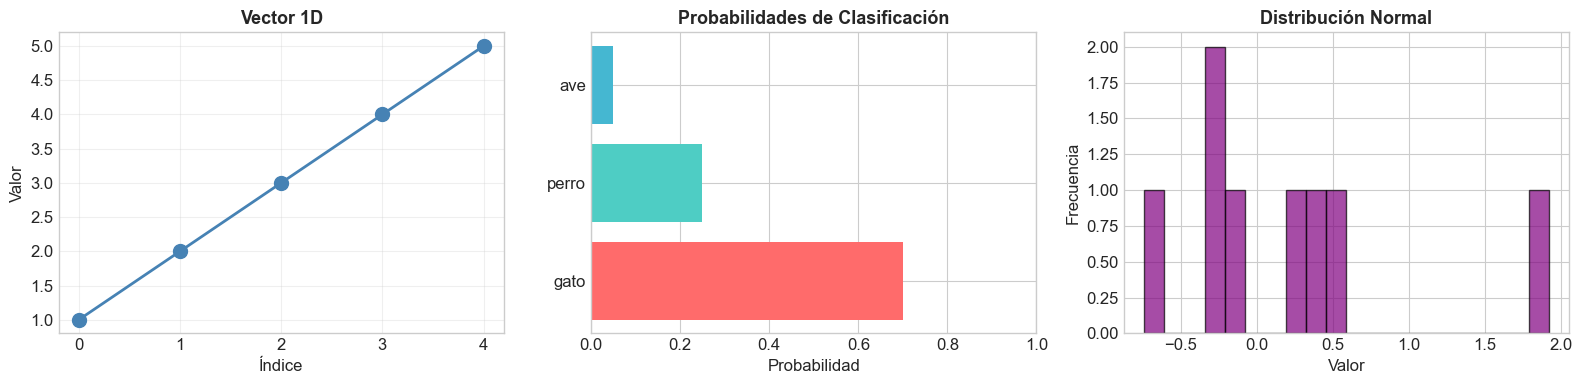

In [15]:
# ============================================================================
# TENSORES 1D - VECTORES
# ============================================================================

print("📊 TENSORES 1D: VECTORES")
print("\/"*80)

# Métodos de creación
vector_lista = torch.tensor([1, 2, 3, 4, 5])
vector_arange = torch.arange(0, 10, 2)  # start, end, step
vector_linspace = torch.linspace(0, 1, 5)  # start, end, num_samples
vector_zeros = torch.zeros(7)
vector_ones = torch.ones(6)
vector_rand = torch.rand(8)  # Uniforme [0, 1) distribución normal 
vector_randn = torch.randn(8)  # Normal N(0,1) distribucion gausseana  media 0 y varianza 1

print("\n 1). MÉTODOS DE CREACIÓN:")
print(f"   torch.tensor([...]): {vector_lista}")
print(f"   torch.arange(0,10,2): {vector_arange}")
print(f"   torch.linspace(0,1,5): {vector_linspace}")
print(f"   torch.zeros(7): {vector_zeros}")
print(f"   torch.rand(8): {vector_rand}")
print(f"   torch.randn(8): {vector_randn}")

# Propiedades
v = vector_lista
print("\n 2). PROPIEDADES:")
print(f"   .ndim: {v.ndim}")
print(f"   .shape: {v.shape}")
print(f"   .size(): {v.size()}")
print(f"   .numel(): {v.numel()} elementos")
print(f"   .dtype: {v.dtype}")

# Indexación
print("\n 3). INDEXACIÓN:")
print(f"   Vector: {v}")
print(f"   v[0]: {v[0]} (primer elemento)")
print(f"   v[-1]: {v[-1]} (último elemento)")
print(f"   v[1:4]: {v[1:4]} (slice)")
print(f"   v[::2]: {v[::2]} (cada 2 elementos)")
print(f"   v[[0,2,4]]: {v[[0,2,4]]} (indexación avanzada)")

# Caso de uso: Probabilidades
clases = ['gato', 'perro', 'ave']
probs = torch.tensor([0.7, 0.25, 0.05])

print("\n EJEMPLO - Probabilidades de Clasificación:")
for clase, prob in zip(clases, probs):
    print(f"   {clase:6s}: {prob.item():.1%} {'█' * int(prob.item() * 20)}") # convertir el tensor a float de python para poderlo imprimir y se pasa a porcentaje con 1 decimal y luego se basan a bloques d euna barra

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Subplot 1: Vector como línea
axes[0].plot(vector_lista.numpy(), 'o-', markersize=10, linewidth=2, color='steelblue')
axes[0].set_title('Vector 1D', fontsize=13, weight='bold')
axes[0].set_xlabel('Índice')
axes[0].set_ylabel('Valor')
axes[0].grid(True, alpha=0.3)

# Subplot 2: Probabilidades
axes[1].barh(clases, probs.numpy(), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Probabilidades de Clasificación', fontsize=13, weight='bold')
axes[1].set_xlabel('Probabilidad')
axes[1].set_xlim(0, 1)

# Subplot 3: Distribución normal
axes[2].hist(vector_randn.numpy(), bins=20, color='purple', alpha=0.7, edgecolor='black')
axes[2].set_title('Distribución Normal', fontsize=13, weight='bold')
axes[2].set_xlabel('Valor')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 3️ TENSORES 2D: MATRICES

Una **matriz** es un tensor de 2 dimensiones (tabla de valores).

### Características:
- `ndim = 2`
- `shape = torch.Size([filas, columnas])`
- Se indexa con `[i, j]` o `[i][j]`

###  Casos de Uso:
- Batch de embeddings: (batch_size, embedding_dim)
- Imagen en escala de grises: (alto, ancho)
- Pesos de capa lineal: (input_features, output_features)
- Dataset tabular: (muestras, features)

---

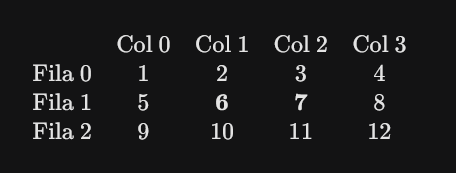

 TENSORES 2D: MATRICES
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

 MÉTODOS DE CREACIÓN:
Desde lista (3×3):
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

torch.zeros(3, 4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

torch.eye(4) - Identidad:
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

 PROPIEDADES:
   .ndim: 2
   .shape: torch.Size([3, 3])
   .size(): torch.Size([3, 3])
   .size(0): 3 filas
   .size(1): 3 columnas
   .numel(): 9 elementos totales

 INDEXACIÓN 2D:
Matriz:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

   M[0, 0]: 1 (elemento en fila 0, columna 0)
   M[1, :]: tensor([4, 5, 6]) (toda la fila 1)
   M[:, 2]: tensor([3, 6, 9]) (toda la columna 2)
   M[0:2, 1:3]:
tensor([[2, 3],
        [5, 6]])
(sub-matriz)

 SHAPE vs SIZE:
   M.shape: t

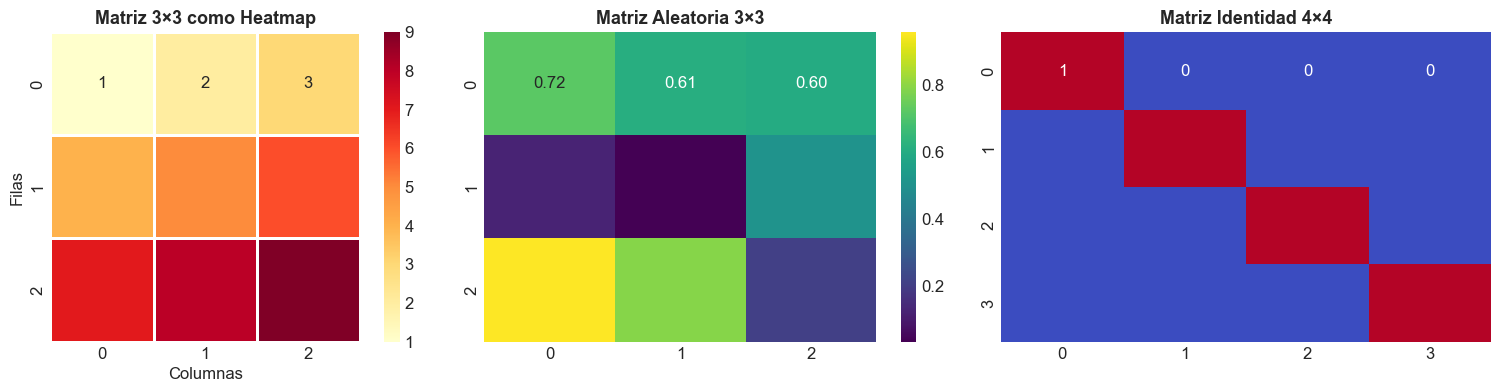


 EJEMPLO - Batch de Embeddings:
   Shape: torch.Size([4, 3])
   Interpretación: 4 ejemplos × 3 dimensiones
   Datos:
tensor([[-0.2839,  0.2252, -0.9691],
        [ 0.1838, -0.9397, -0.2222],
        [-0.4961, -0.6729,  1.1600],
        [ 0.1343,  0.1620,  1.2148]])


In [ ]:
# ============================================================================
# TENSORES 2D - MATRICES
# ============================================================================

print(" TENSORES 2D: MATRICES")
print("\/"*80)

# Crear matrices
matriz_lista = torch.tensor([[1, 2, 3],
                             [4, 5, 6],
                             [7, 8, 9]])

matriz_zeros = torch.zeros(3, 4)  # 3 filas, 4 columnas
matriz_ones = torch.ones(2, 5)
matriz_eye = torch.eye(4)  # Matriz identidad
matriz_rand = torch.rand(3, 3)
matriz_randn = torch.randn(4, 6)

print("\n MÉTODOS DE CREACIÓN:")
print(f"Desde lista (3×3):\n{matriz_lista}\n")
print(f"torch.zeros(3, 4):\n{matriz_zeros}\n")
print(f"torch.eye(4) - Identidad:\n{matriz_eye}\n")

# Propiedades
M = matriz_lista
print(" PROPIEDADES:")
print(f"   .ndim: {M.ndim}")
print(f"   .shape: {M.shape}")
print(f"   .size(): {M.size()}")
print(f"   .size(0): {M.size(0)} filas")
print(f"   .size(1): {M.size(1)} columnas")
print(f"   .numel(): {M.numel()} elementos totales")

# Indexación 2D
print("\n INDEXACIÓN 2D:")
print(f"Matriz:\n{M}\n")
print(f"   M[0, 0]: {M[0, 0]} (elemento en fila 0, columna 0)")
print(f"   M[1, :]: {M[1, :]} (toda la fila 1)")
print(f"   M[:, 2]: {M[:, 2]} (toda la columna 2)")
print(f"   M[0:2, 1:3]:\n{M[0:2, 1:3]}\n(sub-matriz)")

# Shape vs size
print("\n SHAPE vs SIZE:")
print(f"   M.shape: {M.shape}")
print(f"   M.size(): {M.size()}")
print(f"   Son equivalentes: {M.shape == M.size()}")

# Operaciones importantes
print("\n OPERACIONES:")
print(f"   Transpuesta M.T:\n{M.T}\n")
print(f"   Aplanar M.flatten(): {M.flatten()}")
print(f"   Suma por filas M.sum(dim=1): {M.sum(dim=1)}") # dimension 0 en y, dimencion 1 en x, dimension 2 en z
print(f"   Suma por columnas M.sum(dim=0): {M.sum(dim=0)}")
print(f"   Media total M.mean(): {M.float().mean()}")

# Visualización
fig = plt.figure(figsize=(16, 4))

# Subplot 1: Heatmap de matriz
ax1 = plt.subplot(131)
sns.heatmap(M.numpy(), annot=True, fmt='d', cmap='YlOrRd', cbar=True, 
            linewidths=1, linecolor='white', square=True, ax=ax1)
ax1.set_title('Matriz 3x3 como Heatmap', fontsize=13, weight='bold')
ax1.set_xlabel('Columnas')
ax1.set_ylabel('Filas')

# Subplot 2: Matriz aleatoria
ax2 = plt.subplot(132)
sns.heatmap(matriz_rand.numpy(), annot=True, fmt='.2f', cmap='viridis', cbar=True, ax=ax2)
ax2.set_title('Matriz Aleatoria 3x3', fontsize=13, weight='bold')

# Subplot 3: Matriz identidad
ax3 = plt.subplot(133)
sns.heatmap(matriz_eye.numpy(), annot=True, fmt='.0f', cmap='coolwarm', cbar=False, ax=ax3)
ax3.set_title('Matriz Identidad 4x4', fontsize=13, weight='bold')

plt.tight_layout()
plt.show()

# Ejemplo práctico: Batch de embeddings
batch_size = 4
embedding_dim = 3
batch_embeddings = torch.randn(batch_size, embedding_dim)

print("\n EJEMPLO - Batch de Embeddings:")
print(f"   Shape: {batch_embeddings.shape}")
print(f"   Interpretación: {batch_size} ejemplos × {embedding_dim} dimensiones")
print(f"   Datos:\n{batch_embeddings}")

##  TENSORES 3D: CUBOS DE DATOS

Un **tensor 3D** es como un cubo de datos o un stack de matrices.

###  Características:
- `ndim = 3`
- `shape = torch.Size([dim0, dim1, dim2])`
- Se indexa con `[i, j, k]`

###  Casos de Uso MÁS COMUNES:
- **Series temporales**: (batch_size, sequence_length, features)
- **Imágenes RGB**: (canales, alto, ancho) o (alto, ancho, canales)
- **Secuencias de texto**: (batch, sequence, embedding_dim)
- **Video frame**: (frames, alto, ancho)

###  Formato Estándar en PyTorch:

Para datos secuenciales el formato estándar es:
```
(Batch, Sequence, Features)
```

**Ejemplo:** 32 frases de 100 palabras con embeddings de 300 dimensiones
```python
tensor_shape = (32, 100, 300)
```

---

 TENSORES 3D: CUBOS DE DATOS
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

 CASO DE USO: SERIES TEMPORALES
********************************************************************************
Shape de series temporales: torch.Size([32, 100, 5])
Interpretación:
  • Dimensión 0 (Batch): 32 series diferentes
  • Dimensión 1 (Tiempo): 100 pasos temporales
  • Dimensión 2 (Features): 5 variables por paso
  • Total de elementos: 16000

 INDEXACIÓN EN 3D:
--------------------------------------------------------------------------------
Tensor 3D:
tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

Shape: torch.Size([3, 2, 2])
T[0]: Primera 'capa' (matriz 2×2):
tensor([[1, 2],
        [3, 4]])

T[0, 0]: Primera fila de la primera capa: tensor([1, 2])
T[0, 0, 0]: Un solo elemento (escalar): 1

 SLICING AVANZADO:
T[:, 

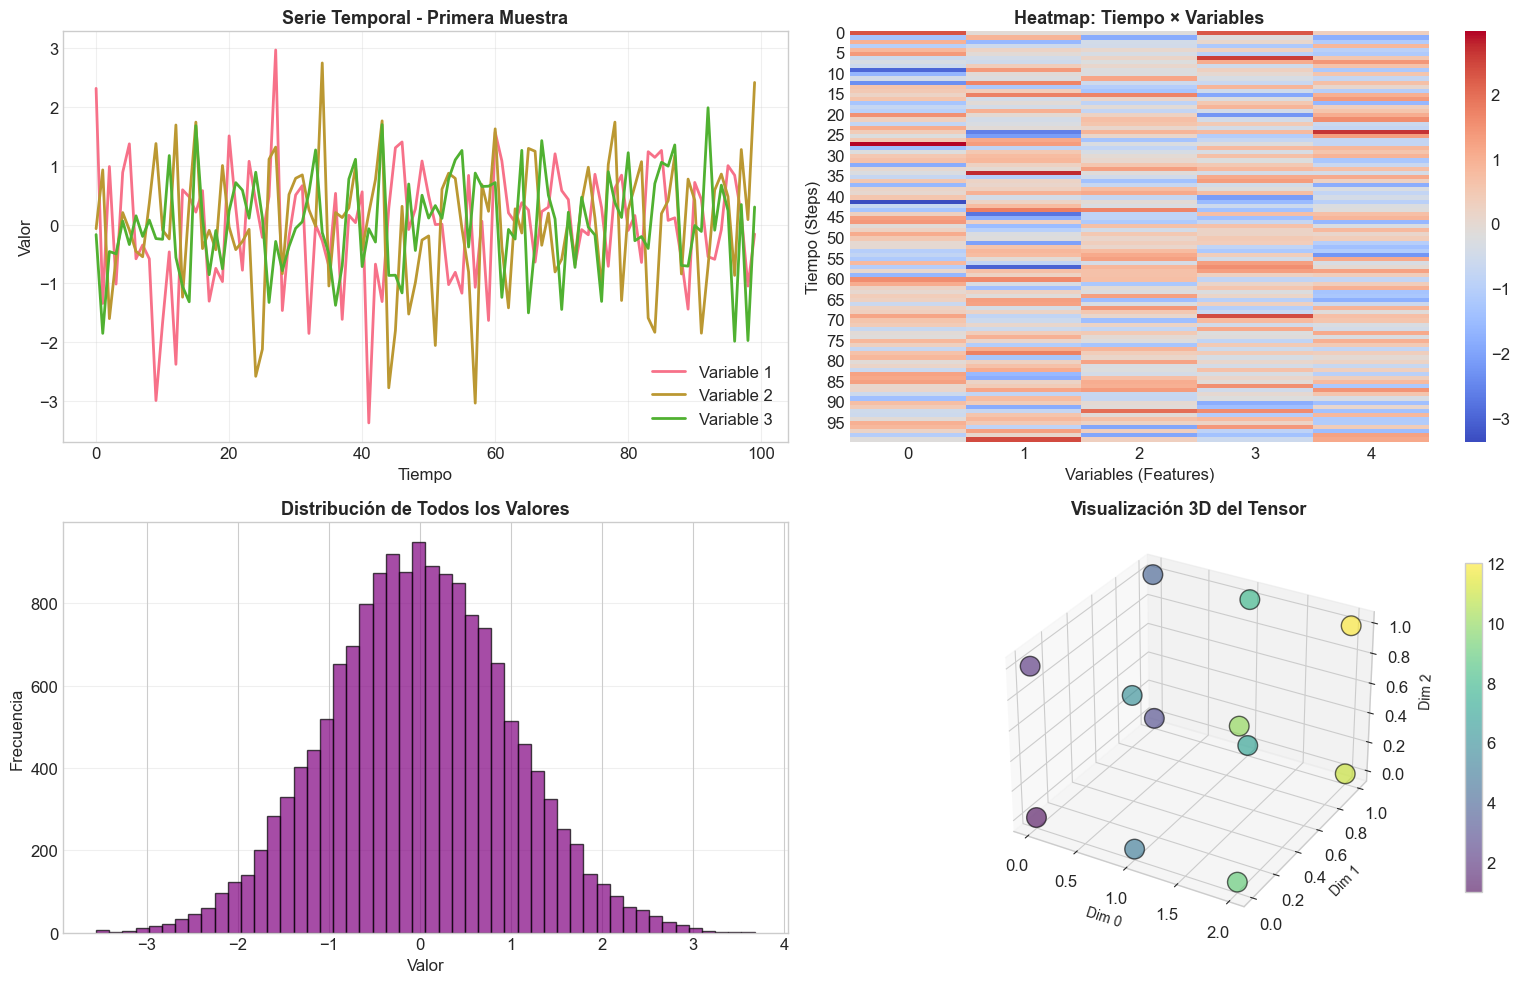


 Visualización guardada: 'tensores_3d_visualizacion.png'

 RESHAPE 3D → 2D:
Original shape: torch.Size([32, 100, 5])
Después de flatten: torch.Size([32, 500])
Interpretación: 32 muestras × 500 features totales


In [ ]:
# ============================================================================
# TENSORES 3D - CUBOS DE DATOS
# ============================================================================

print(" TENSORES 3D: CUBOS DE DATOS")
print("\/"*80)

# Crear tensores 3D
tensor_3d_manual = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])

# Formas comunes de crear 3D
batch_size, seq_length, features = 4, 10, 8
tensor_3d_zeros = torch.zeros(batch_size, seq_length, features)
tensor_3d_randn = torch.randn(batch_size, seq_length, features)

# Caso real: Series temporales
print("\n CASO DE USO: SERIES TEMPORALES")
print("*"*80)

# Simulación: 32 series de 100 pasos con 5 variables cada una
num_series = 32
time_steps = 100
num_variables = 5

series_temporales = torch.randn(num_series, time_steps, num_variables)

print(f"Shape de series temporales: {series_temporales.shape}")
print(f"Interpretación:")
print(f"  • Dimensión 0 (Batch): {series_temporales.size(0)} series diferentes")
print(f"  • Dimensión 1 (Tiempo): {series_temporales.size(1)} pasos temporales")
print(f"  • Dimensión 2 (Features): {series_temporales.size(2)} variables por paso")
print(f"  • Total de elementos: {series_temporales.numel()}")

# Indexación 3D
print("\n INDEXACIÓN EN 3D:")
print("-"*80)

T = tensor_3d_manual
print(f"Tensor 3D:\n{T}\n")
print(f"Shape: {T.shape}")
print(f"T[0]: Primera 'capa' (matriz 2×2):\n{T[0]}\n")
print(f"T[0, 0]: Primera fila de la primera capa: {T[0, 0]}")
print(f"T[0, 0, 0]: Un solo elemento (escalar): {T[0, 0, 0]}")

# Slicing avanzado
print("\n SLICING AVANZADO:")
print(f"T[:, 0, :]: Primera fila de todas las capas:\n{T[:, 0, :]}\n")
print(f"T[:, :, 0]: Primera columna de todas las matrices:\n{T[:, :, 0]}\n")

# Operaciones por dimensión
print("\n OPERACIONES POR DIMENSIÓN:")
print(f"Suma total: {series_temporales.sum().item():.2f}")
print(f"Suma por batch (dim=0): {series_temporales.sum(dim=0).shape}")
print(f"Suma por tiempo (dim=1): {series_temporales.sum(dim=1).shape}")
print(f"Suma por features (dim=2): {series_temporales.sum(dim=2).shape}")

# Media por variable a través del tiempo
media_temporal = series_temporales.mean(dim=1)  # (32, 5)
print(f"\nMedia temporal (promedio de cada variable): {media_temporal.shape}")

# Visualización
fig = plt.figure(figsize=(16, 10))

# Subplot 1: Visualizar una serie temporal
ax1 = plt.subplot(2, 2, 1)
serie_ejemplo = series_temporales[0, :, :3]  # Primera serie, primeras 3 variables
for i in range(3):
    ax1.plot(serie_ejemplo[:, i].numpy(), label=f'Variable {i+1}', linewidth=2)
ax1.set_title('Serie Temporal - Primera Muestra', fontsize=13, weight='bold')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Valor')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Heatmap de una muestra
ax2 = plt.subplot(2, 2, 2)
import seaborn as sns
sns.heatmap(series_temporales[0].numpy(), cmap='coolwarm', ax=ax2, cbar=True)
ax2.set_title('Heatmap: Tiempo x Variables', fontsize=13, weight='bold')
ax2.set_xlabel('Variables (Features)')
ax2.set_ylabel('Tiempo (Steps)')

# Subplot 3: Distribución de valores
ax3 = plt.subplot(2, 2, 3)
ax3.hist(series_temporales.flatten().numpy(), bins=50, color='purple', alpha=0.7, edgecolor='black')
ax3.set_title('Distribución de Todos los Valores', fontsize=13, weight='bold')
ax3.set_xlabel('Valor')
ax3.set_ylabel('Frecuencia')
ax3.grid(True, alpha=0.3, axis='y')

# Subplot 4: Visualización 3D de tensor pequeño
ax4 = plt.subplot(2, 2, 4, projection='3d')
# Crear coordenadas para el tensor manual
x, y, z = [], [], []
valores = []
for i in range(T.shape[0]):
    for j in range(T.shape[1]):
        for k in range(T.shape[2]):
            x.append(i)
            y.append(j)
            z.append(k)
            valores.append(T[i, j, k].item())

scatter = ax4.scatter(x, y, z, c=valores, cmap='viridis', s=200, alpha=0.6, edgecolors='black')
ax4.set_xlabel('Dim 0', fontsize=10)
ax4.set_ylabel('Dim 1', fontsize=10)
ax4.set_zlabel('Dim 2', fontsize=10)
ax4.set_title('Visualización 3D del Tensor', fontsize=13, weight='bold')
plt.colorbar(scatter, ax=ax4, pad=0.1, shrink=0.8)

plt.tight_layout()

plt.show()



# Reshape 3D a 2D (común antes de capas fully-connected)
print("\n RESHAPE 3D → 2D:")
print(f"Original shape: {series_temporales.shape}")
flattened = series_temporales.reshape(num_series, -1)
print(f"Después de flatten: {flattened.shape}")
print(f"Interpretación: {flattened.size(0)} muestras x {flattened.size(1)} features totales")

#========================================
 Material de apoyo 
#========================================


Una tabla mental: ¿qué representa cada dimensión?

En Deep Learning se usa una notación compacta para hablar de dimensiones:

    B: Batch (cuántos ejemplos procesas a la vez)
    C: canales (channels), por ejemplo 1 (grises) o 3 (RGB)
    H y W: alto (height) y ancho (width) de una imagen
    D: dimensión de características (features)
    T: longitud de una secuencia (texto, audio, etc.)

Ejemplo: si una imagen está en formato (B, C, H, W) entonces:

    B imágenes
    cada una con C canales
    de tamaño H×W


funciones: shape, dtype, device

Tres preguntas que siempre debes poder responder:

    ¿Qué forma tiene? → tensor.shape
    ¿Qué tipo de dato guarda? → tensor.dtype
    ¿En qué dispositivo vive? → tensor.device

dtype (tipo de dato)

En DL se usa mucho:

    torch.float32 para cálculos (pesos, activaciones)
    torch.int64 para índices / clases
    torch.bool para máscaras (True/False)

device

    CPU: cpu
    GPU: cuda




In [24]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
print("Antes ->", x.dtype, x.device)

x = x.to(device)
print("Después ->", x.dtype, x.device)

Antes -> torch.float32 cpu
Después -> torch.float32 cuda:0


Reto manejo de tensores

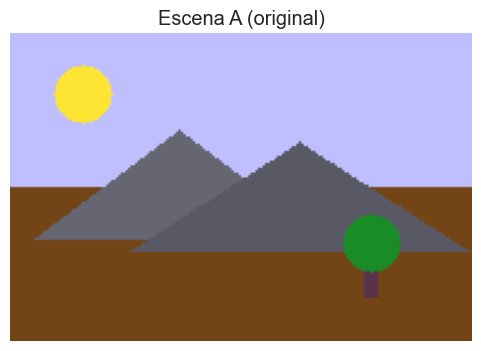

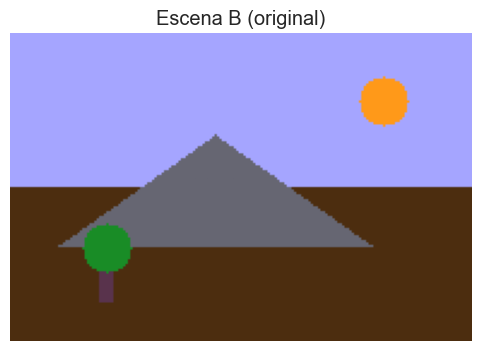

In [35]:
def show(img, title=""):
    # img: (H,W,3) en [0,1]
    plt.figure(figsize=(6,4))
    plt.imshow(img.clamp(0,1).cpu().numpy())
    plt.title(title)
    plt.axis("off")
    plt.show()

def make_canvas(H=128, W=192, sky=0.75, ground=0.45, device=device):
    img = torch.zeros((H, W, 3), dtype=torch.float32, device=device)

    # Cielo
    img[:H//2, :, :] = torch.tensor([sky, sky, 1.0], device=device)

    # Suelo
    img[H//2:, :, :] = torch.tensor([ground, 0.6*ground, 0.2*ground], device=device)

    return img

def draw_sun(img, cx=30, cy=25, r=12, color=(1.0, 0.9, 0.2)):
    H, W, _ = img.shape
    yy = torch.arange(H, device=img.device).view(-1,1).expand(H,W)
    xx = torch.arange(W, device=img.device).view(1,-1).expand(H,W)
    mask = (xx - cx)**2 + (yy - cy)**2 <= r**2
    img[mask] = torch.tensor(color, device=img.device)
    return mask  # útil para copiar/borrar

def draw_mountain(img, peak_x=90, peak_y=45, base_y=80, half_width=55, color=(0.4,0.4,0.45)):
    H, W, _ = img.shape
    yy = torch.arange(H, device=img.device).view(-1,1).expand(H,W)
    xx = torch.arange(W, device=img.device).view(1,-1).expand(H,W)

    # Triángulo: |x-peak_x| <= (yy-peak_y)*slope  y entre peak_y y base_y
    height = base_y - peak_y
    slope = half_width / max(height, 1)
    mask = (yy >= peak_y) & (yy <= base_y) & (torch.abs(xx - peak_x) <= (yy - peak_y) * slope)
    img[mask] = torch.tensor(color, device=img.device)
    return mask

def draw_tree(img, x=140, y_base=105, trunk_h=18, trunk_w=6, canopy_r=12):
    # Tronco (rectángulo)
    trunk_color = torch.tensor([0.35, 0.2, 0.3], device=img.device)
    leaf_color  = torch.tensor([0.1, 0.55, 0.15], device=img.device)

    # tronco: slicing rectangular
    y0 = y_base - trunk_h
    y1 = y_base
    x0 = x - trunk_w//2
    x1 = x + trunk_w//2
    img[y0:y1, x0:x1, :] = trunk_color

    # copa: círculo
    H, W, _ = img.shape
    yy = torch.arange(H, device=img.device).view(-1,1).expand(H,W)
    xx = torch.arange(W, device=img.device).view(1,-1).expand(H,W)
    mask = (xx - x)**2 + (yy - (y0-5))**2 <= canopy_r**2
    img[mask] = leaf_color

    # Devuelve máscara aproximada del árbol (tronco + copa)
    tree_mask = torch.zeros((H,W), dtype=torch.bool, device=img.device)
    tree_mask[y0:y1, x0:x1] = True
    tree_mask |= mask
    return tree_mask

# Crear 2 escenas
imgA = make_canvas()
imgB = make_canvas(sky=0.65, ground=0.30)

sunA = draw_sun(imgA, cx=30, cy=25, r=12)
m1A  = draw_mountain(imgA, peak_x=70, peak_y=40, base_y=85, half_width=60)
m2A  = draw_mountain(imgA, peak_x=120, peak_y=45, base_y=90, half_width=70, color=(0.35,0.35,0.4))
treeA = draw_tree(imgA, x=150, y_base=110)

sunB = draw_sun(imgB, cx=155, cy=28, r=10, color=(1.0, 0.6, 0.1))
m1B  = draw_mountain(imgB, peak_x=85, peak_y=42, base_y=88, half_width=65)
treeB = draw_tree(imgB, x=40, y_base=112,  canopy_r=10)

show(imgA, "Escena A (original)")
show(imgB, "Escena B (original)")

1. En la iamgen A agregar mas arboles con otras tonalidades, con una direcena de 20 pixeles entre ellos
2. Convertir la imagen b en un formato  vertical (rotarla 90 grados), y poner el sol normal al apicedel triangulo d ela montaña.

# DERIVADAS

Autograd: derivadas “sin dolor”

Aquí está la magia de PyTorch:
un tensor puede “recordar” cómo fue calculado y permitir derivar automáticamente.
Conceptos mínimos

    requires_grad=True le dice a PyTorch: “voy a necesitar gradientes de esto”.
    .backward() calcula derivadas.
    Los gradientes quedan guardados en .grad (en los tensores hoja / leaf tensors).

Derivada de la identidad

Si y = x, entonces dy/dx = 1.

In [25]:
x = torch.tensor([3.0], requires_grad=True, device=device)
y = x  # identidad
y.backward()
print("x:", x.item())
print("y:", y.item())
print("dy/dx =", x.grad.item())

x: 3.0
y: 3.0
dy/dx = 1.0


Derivada de una función simple (pérdida)

Vamos a usar una función tipo “pérdida”: [ f(x) = (x - 2)^2 ]

    El mínimo está en x=2.
    El gradiente te dice hacia dónde moverte.

Primero nos toca calcular la pérdida y luego el gradiente

In [26]:
def f(x):
    return (x - 2.0)**2

x = torch.tensor([-3.5], requires_grad=True, device=device)
loss = f(x)
loss.backward()

print("x:", x.item())
print("loss:", loss.item())
print("grad df/dx:", x.grad.item())

x: -3.5
loss: 30.25
grad df/dx: -11.0


Esto vuelve tangible la idea de gradiente:

    Si la pendiente es negativa, te mueves a la derecha.
    Si la pendiente es positiva, te mueves a la izquierda.


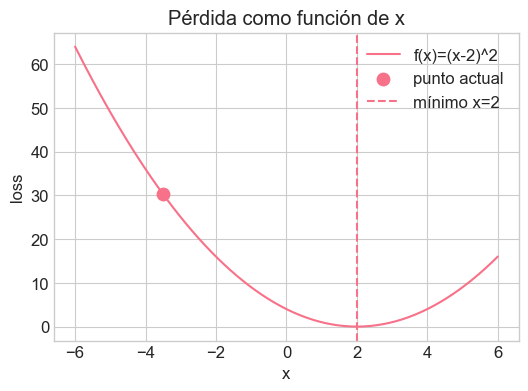

In [27]:
xs = torch.linspace(-6, 6, 200)
ys = (xs - 2)**2

plt.figure(figsize=(6,4))
plt.plot(xs.numpy(), ys.numpy(), label="f(x)=(x-2)^2")
plt.scatter([x.detach().cpu().item()], [loss.detach().cpu().item()], s=80, label="punto actual")
plt.axvline(2, linestyle="--", label="mínimo x=2")
plt.title("Pérdida como función de x")
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.show()

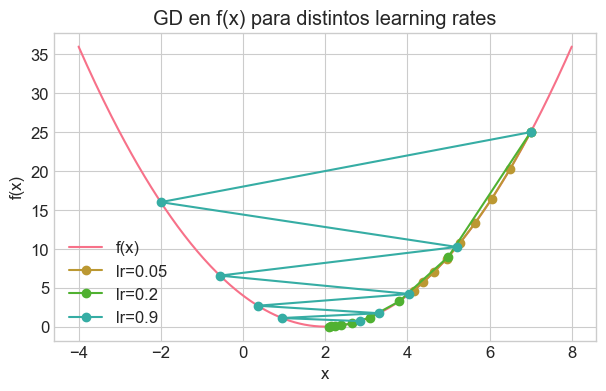

In [36]:
# ============================================
# MINI-SIMULACIÓN: GRADIENT DESCENT (GD)
# ============================================
# Regla de actualización de GD:
#   x_{t+1} = x_t - lr * df(x_t)
#
# donde:
#   - lr = learning rate (tamaño de paso).
#
# Interpretación:
#   - df(x) te dice "hacia dónde sube" la función.
#   - Restar lr*df(x) te mueve en dirección contraria: hacia donde baja.
def df(x):
    # Derivada:
    #   f(x) = (x - 2)^2
    #   df/dx = 2(x - 2) = 2x - 4
    return 2.0 * x - 4.0

def run_gd(x0, lr, steps=10):
    # x0: punto inicial
    # lr: learning rate
    # steps: número de actualizaciones
    x = x0
    traj = [x]  # guardamos la trayectoria (para graficar)

    for _ in range(steps):
        grad = df(x)           # derivada en el punto actual
        x = x - lr * grad      # actualización GD
        traj.append(x)

    return np.array(traj)

# Punto inicial
x0 = 7.0

# Probamos distintos learning rates
lrs = [0.05, 0.2, 0.9]

# Para graficar la función y las trayectorias
xs_plot = np.linspace(-4, 8, 300)

plt.figure(figsize=(7, 4))
plt.plot(xs_plot, f(xs_plot), label="f(x)")  # curva base

for lr in lrs:
    traj = run_gd(x0, lr, steps=8)           # trayectoria de GD
    plt.plot(traj, f(traj), marker="o", label=f"lr={lr}")

plt.title("GD en f(x) para distintos learning rates")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

Backpropagation (sin drama)

**Backprop** es simplemente aplicar la regla de la cadena ‘hacia atrás’ en el grafo para obtener gradientes.

En PyTorch ocurre cuando llamas:

- `loss.backward()`

In [ ]:
# 1. Definimos los datos fijos (Lo que entra y lo que queremos que salga)
x = torch.tensor([3.0])      # Entrada
y_true = torch.tensor([10.0]) # La meta (Target)

# 2. Definimos los parámetros entrenables (Los que la red puede mover)
w = nn.Parameter(torch.tensor([1.0])) # Peso inicial
b = nn.Parameter(torch.tensor([0.0])) # Sesgo inicial

print(f"--- Situación Inicial ---\nEntrada: {x.item()} | Peso: {w.item()} | Sesgo: {b.item()}")

# TODO 1: forward (La Predicción)
# Fórmula de la recta/neurona: y = w * x + b
# Cálculo mental: 1.0 * 3.0 + 0.0 = 3.0
y_hat = x * w + b
print(f"Predicción (y_hat): {y_hat.item()} (Queríamos un 10.0)")

# TODO 2: loss (El Error)
# Error cuadrático: (Predicción - Realidad)^2
# (3.0 - 10.0)^2 = (-7.0)^2 = 49.0
loss = (y_hat - y_true)**2
print(f"Error (Loss): {loss.""()}")

# TODO 3: backward (La Auditoría)
# PyTorch calcula: "¿Qué tanto influyó w y b en este error de 49.0?"
loss.""()

# TODO 4: imprime gradientes (Las Culpas)
print("-" * 30)
print("dw (Culpa del peso):", w.grad.item())
print("db (Culpa del sesgo):", b.grad.item())


--- Situación Inicial ---
Entrada: 3.0 | Peso: 1.0 | Sesgo: 0.0
Predicción (y_hat): 3.0 (Queríamos un 10.0)
Error (Loss): 49.0
------------------------------
dw (Culpa del peso): -42.0
db (Culpa del sesgo): -14.0


Si llamas `backward()` dos veces sin limpiar, se suman gradientes. Por eso usamos `zero_grad()`.

In [44]:
x = torch.tensor([7.0], requires_grad=True)

# Primer backward
loss1 = (x - 2.0) ** 2
loss1.backward()
print("grad 1:", x.grad.item())

# Segundo backward (sin limpiar grad)
loss2 = (x - 2.0) ** 2
loss2.backward()
print("grad acumulado (grad1 + grad2):", x.grad.item())

# Limpieza manual del gradiente
x.grad.zero_()
print("grad después de zero_():", x.grad.item())

grad 1: 10.0
grad acumulado (grad1 + grad2): 20.0
grad después de zero_(): 0.0


# Recordatorio funciones de activacion y optimizadores

## ¿Qué es un Optimizador y qué es una Función de Activación?

### Optimizador

Un **optimizador** es el algoritmo que ajusta los pesos (parámetros) de una red neuronal durante el entrenamiento para minimizar el error. Su trabajo es encontrar los mejores valores posibles para que el modelo haga predicciones precisas.

**¿Para qué sirve?**
- Actualiza los pesos de la red después de cada iteración
- Decide cuánto y en qué dirección cambiar cada parámetro
- Controla la velocidad de aprendizaje (qué tan grandes son los ajustes)

**Ejemplos comunes:**
- **SGD (Stochastic Gradient Descent)**: El más básico, sigue la dirección del gradiente
- **Adam**: El más popular, adapta automáticamente el tamaño de los pasos para cada parámetro
- **RMSprop, AdaGrad**: Variantes que ajustan el learning rate dinámicamente

**Analogía:** Es como un GPS que te guía hacia el punto más bajo de un valle. En cada paso, calcula la dirección de descenso y decide qué tan grande debe ser tu siguiente paso.



###  Función de Activación

Una **función de activación** es una operación matemática que se aplica a la salida de cada neurona para introducir no-linealidad en la red. Transforma la suma ponderada de las entradas en un valor de salida.

**¿Para qué sirve?**
- Decide si una neurona debe "activarse" (disparar) o no
- Introduce capacidad de aprender patrones complejos y no-lineales
- Sin funciones de activación, una red neuronal sería solo una regresión lineal, sin importar cuántas capas tenga

**Ejemplos comunes:**
- **ReLU**: $f(x) = \max(0, x)$ - Devuelve 0 si x es negativo, x si es positivo
- **Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$ - Convierte cualquier valor en un rango (0, 1)
- **Tanh**: $f(x) = \tanh(x)$ - Convierte valores al rango (-1, 1)
- **Softmax**: Convierte un vector en probabilidades que suman 1 (para clasificación)

**Analogía:** Es como un interruptor o filtro en cada neurona. Decide qué información es lo suficientemente importante como para pasar a la siguiente capa.

---

###  **En resumen:**

| Aspecto | Optimizador | Función de Activación |
|---------|-------------|----------------------|
| **¿Cuándo actúa?** | Durante el entrenamiento (backpropagation) | Durante forward pass (propagación hacia adelante) |
| **¿Qué modifica?** | Los **pesos** de la red | La **salida** de cada neurona |
| **¿Dónde está?** | Es un algoritmo externo a la red | Está dentro de cada neurona/capa |
| **Propósito** | Aprender (encontrar mejores parámetros) | Transformar datos (introducir no-linealidad) |
| **Frecuencia** | Se usa solo al entrenar | Se usa siempre (entrenamiento y predicción) |


- La **función de activación** es parte de la arquitectura de la red (define cómo fluye la información)
- El **optimizador** es parte del proceso de aprendizaje (define cómo mejora la red)

**Ejemplo práctico:** Al reconocer un pajaro en una imagen:
1. Las **funciones de activación** procesan la imagen capa por capa: "¿hay alas? ¿Hay picos?"
2. El **optimizador** (durante el entrenamiento) ajusta los pesos: "La última vez confundí un avion con un pajaro, debo dar más importancia a los picos"

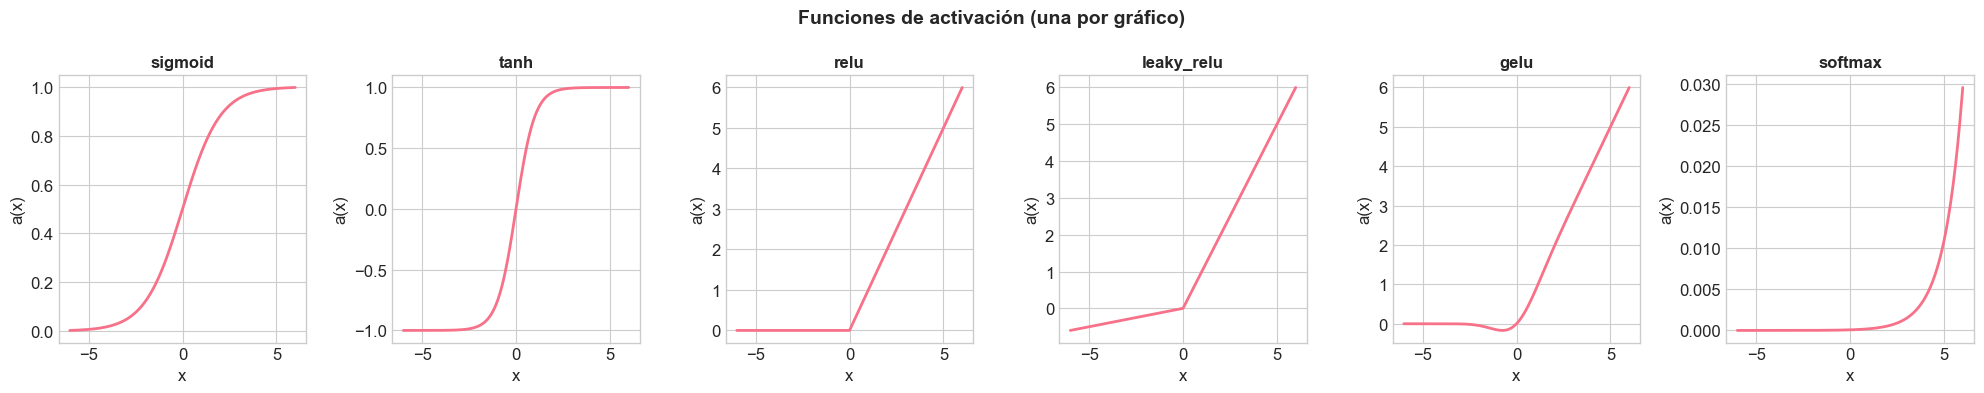

In [39]:

xs = torch.linspace(-6, 6, 400)


acts = {
    "sigmoid"    : torch.sigmoid(xs),
    "tanh"       : torch.tanh(xs),
    "relu"       : F.relu(xs),
    "leaky_relu" : F.leaky_relu(xs, negative_slope=0.1),
    "gelu"       : F.gelu(xs),
    "softmax"    : F.softmax(xs, dim=0),   # Softmax sobre el vector completo
}


fig, axes = plt.subplots(1, len(acts), figsize=(20, 4))

for ax, (name, y) in zip(axes, acts.items()):
    ax.plot(xs.numpy(), y.numpy(), linewidth=2)
    ax.set_title(name, fontsize=12, weight="bold")
    ax.set_xlabel("x")
    ax.set_ylabel("a(x)")
    ax.grid(True)

plt.suptitle("Funciones de activación (una por gráfico)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()



### Mini-guía práctica 

- Capas ocultas: empieza con **ReLU** (baseline).
- Si ves neuronas ‘muertas’: prueba **LeakyReLU** o **GELU**.
- Salida: depende del problema (veremos en regresión vs clasificación).

| Activación | Rango          | Dónde usarla                 | Para qué sirve                  | Riesgos                  |
| ---------- | -------------- | ---------------------------- | ------------------------------- | ------------------------ |
| ReLU       | [0, +inf)      | Capas ocultas en CNN, MLP    | Rápida, estable                 | Neuronas muertas         |
| Leaky ReLU | (-inf, +inf)   | Capas ocultas si ReLU falla  | Mantiene gradiente en negativos | Un poco de ruido         |
| GELU       | (-inf, +inf)   | Transformers, NLP, ViT       | Flujo suave de gradientes       | Más costosa              |
| Tanh       | (-1, 1)        | Redes pequeñas, RNN clásicas | Centrada en cero                | Se satura                |
| Sigmoid    | (0, 1)         | Salida binaria               | Probabilidad                    | Vanishing gradient       |
| Softmax    | (0, 1), suma=1 | Salida multiclase            | Distribución de probabilidad    | No usar en capas ocultas |


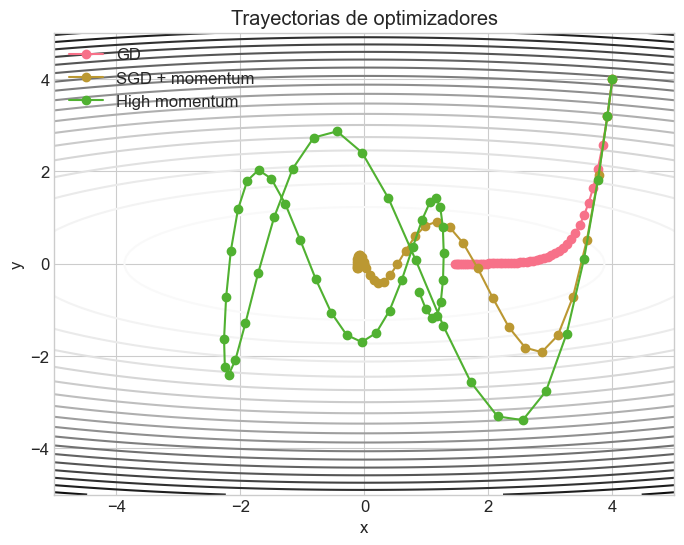

In [41]:


# Función de pérdida tipo valle
def loss_fn(x, y):
    return 0.1*(x**2) + y**2

# Gradientes analíticos
def grad(x, y):
    dx = 0.2*x
    dy = 2*y
    return dx, dy

# Simulación genérica de optimizador
def run_optimizer(name, lr=0.1, momentum=0.0, steps=50):
    x, y = torch.tensor(4.0), torch.tensor(4.0)
    vx, vy = 0.0, 0.0
    path = [(x.item(), y.item())]

    for _ in range(steps):
        dx, dy = grad(x, y)

        # Momentum
        vx = momentum * vx + dx
        vy = momentum * vy + dy

        # Update
        x -= lr * vx
        y -= lr * vy

        path.append((x.item(), y.item()))

    return path

# Ejecutar distintos optimizadores
paths = {
    "GD": run_optimizer("GD", lr=0.1, momentum=0.0),
    "SGD + momentum": run_optimizer("SGD+M", lr=0.1, momentum=0.8),
    "High momentum": run_optimizer("HighM", lr=0.1, momentum=0.95)
}

# Dibujar superficie
xs = torch.linspace(-5,5,100)
ys = torch.linspace(-5,5,100)
X,Y = torch.meshgrid(xs, ys, indexing="ij")
Z = loss_fn(X,Y)

plt.figure(figsize=(8,6))
plt.contour(X,Y,Z, levels=20)

# Dibujar trayectorias
for name, path in paths.items():
    path = torch.tensor(path)
    plt.plot(path[:,0], path[:,1], 'o-', label=name)

plt.legend()
plt.title("Trayectorias de optimizadores")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## ¿Qué optimizador usar y cuándo?

Los optimizadores controlan cómo los parámetros del modelo se mueven para minimizar la función de pérdida.

| Optimizador | Qué hace | Cuándo usarlo | Ventajas | Riesgos |
|-------------|--------|--------------|---------|--------|
| SGD | Da pasos en la dirección del gradiente | Modelos pequeños, datasets limpios | Simple, estable | Lento |
| SGD + Momentum | Usa velocidad acumulada | Redes profundas, visión | Converge más rápido | Puede oscilar |
| Nesterov | Momentum "anticipado" | CNNs, visión | Más preciso | Sensible a lr |
| Adam | Ajusta lr por parámetro | NLP, Transformers, datos ruidosos | Rápido, robusto | Puede sobreajustar |
| AdamW | Adam + regularización correcta | LLMs, Transformers modernos | Mejor generalización | Algo más costoso |
| RMSprop | Escala por varianza | RNNs, series temporales | Estable | Menos usado hoy |

## Regla práctica
- **CNNs / visión → SGD + Momentum**
- **Transformers / NLP → AdamW**
- **Prototipos rápidos → Adam**
- **Datos ruidosos → Adam o RMSprop**
- **Producción final → SGD + Momentum**


In [45]:
# MINIMIZAR UNA FUNCIÓN: USANDO OPTIMIZADOR
# ============================================

#
# Conceptos:
#   - nn.Parameter: tensor entrenable (PyTorch lo trata como parámetro del modelo).
#   - optimizer = torch.optim.SGD([...], lr=...)
#   - optimizer.zero_grad(): limpia gradientes
#   - loss.backward(): calcula gradientes
#   - optimizer.step(): actualiza parámetros

# 1) Definimos x como parámetro entrenable
x = nn.Parameter(torch.tensor([7.0]))

# 2) Definimos optimizador (SGD)
optimizer = torch.optim.SGD([x], lr=0.2)

history = []

for step in range(15):
    # 3) Limpiar gradientes acumulados
    optimizer.zero_grad()

    # 4) Calcular loss
    loss = (x - 2.0) ** 2

    # 5) Backprop
    loss.backward()

    # 6) Actualizar parámetro
    optimizer.step()

    history.append((step, x.item(), loss.item()))

print("Primeras 5 iteraciones:", history[:5])
print("Última iteración:", history[-1])

Primeras 5 iteraciones: [(0, 5.0, 25.0), (1, 3.799999952316284, 9.0), (2, 3.0799999237060547, 3.239999771118164), (3, 2.6480000019073486, 1.1663998365402222), (4, 2.3887999057769775, 0.4199039936065674)]
Última iteración: (14, 2.0023508071899414, 1.5352063201135024e-05)


# OOP: clases padre/hijo + herencia (y por qué importa en PyTorch)

En PyTorch, casi siempre se crean los  modelos **heredando** de `nn.Module` y redefiniendo `forward()`.



In [42]:
# ============================================
# EJEMPLO OOP "DE JUGUETE": HERENCIA
# ============================================
# 
# En PyTorch esto es CRUCIAL ya que los modelos heredan de nn.Module.
#
# Analogía:
#   - Clase padre: un "contrato" (promesa) de que existirá un método forward(...)
#   - Clase hija : una implementación concreta de ese contrato

class ModeloBase:
    # forward define "qué hace" el modelo cuando recibe una entrada x
    # Aquí NO implementamos nada; solo obligamos a las clases hijas a implementarlo.
    def forward(self, x):
        raise NotImplementedError(
            "La clase hija debe implementar forward(x). "
            "Piensa esto como: 'sin forward, no hay modelo'."
        )

class RegresorLinea(ModeloBase):
    # __init__ se ejecuta al crear el objeto. Aquí guardamos parámetros del modelo.
    def __init__(self, w, b):
        self.w = w  # pendiente
        self.b = b  # intercepto

    # Implementamos forward: y = w*x + b
    def forward(self, x):
        return self.w * x + self.b

# Creamos una instancia (un objeto real) del modelo lineal
m = RegresorLinea(w=2.0, b=1.0)

# Probamos una entrada
x = 3.0
y = m.forward(x)  # En PyTorch normalmente harías: y = m(x) si fuera nn.Module
print("Para x=3.0, la predicción es y =", y)


Para x=3.0, la predicción es y = 7.0


Herencia real en PyTorch: `nn.Module`

Puntos clave:

- `super().__init__()` inicializa el módulo padre.
- Todo `nn.Linear`, `nn.Conv2d`, etc. que declares como atributo queda **registrado**.
- `model.parameters()` encuentra automáticamente los parámetros entrenables.

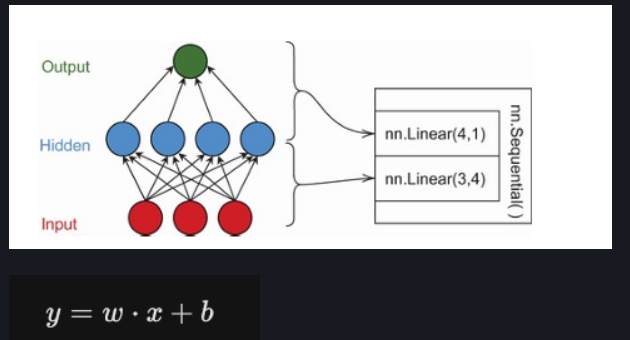

- En PyTorch, SIEMPRE heredas de nn.Module.
- Definir capas en __init__ "registra" parámetros entrenables.
 - forward define cómo pasan los datos por esas capas.

| Funcionalidad          | Qué hace                                   |
| ---------------------- | ------------------------------------------ |
| `.parameters()`        | Devuelve todos los pesos entrenables       |
| `.to(device)`          | Mueve todo el modelo a CPU o GPU           |
| `.cuda()`              | Mueve a GPU                                |
| `.train()` / `.eval()` | Cambia comportamiento (Dropout, BatchNorm) |
| `.state_dict()`        | Serializa pesos                            |
| `.load_state_dict()`   | Carga pesos                                |
| `.modules()`           | Recorre subcapas                           |
| `backward()`           | Autograd funciona correctamente            |


In [ ]:
class MLP_Explicado(nn.Module):
    def __init__(self, in_features=3, hidden=8, out_features=1):
        # 1) super().__init__() es OBLIGATORIO.
        #    Es como decir: "PyTorch, inicializa todo lo necesario:
        #    autograd, registro de parámetros, .to(device), etc."
        super().__init__()

        # 2) Definimos las CAPAS (los bloques de construcción).
        #    Aún NO estamos "corriendo" datos: solo estamos definiendo el plano.
        #    nn.Linear implementa: y = xW^T + b  (matricial)
        self.capa_entrada = nn.Linear(in_features, hidden)    # 3 -> 8
        self.capa_salida  = nn.Linear(hidden, out_features)   # 8 -> 1

    def forward(self, x):
        # 3) Definimos el FLUJO (la receta).
        #    El forward describe el "camino" del tensor:
        #    x -> Linear -> ReLU -> Linear -> salida
        #
        # Importante:
        #   - forward NO debe modificar pesos manualmente.
        #   - forward debe ser una secuencia de operaciones diferenciales (autograd las registra).

        x = self.capa_entrada(x)   # Transformación lineal
        x = F.relu(x)              # Activación: pone 0 donde x < 0
        x = self.capa_salida(x)    # Transformación final (logit o predicción)
        return x

# 4) Creamos una instancia (un objeto) del modelo
modelo = MLP_Explicado()

# 5) Imprimimos la arquitectura: PyTorch te muestra las capas registradas
print(modelo)

# 6) ¿Cuántos parámetros entrenables hay?
#    p.numel() = número de elementos (pesos) en ese tensor
#    p.requires_grad indica si se entrena (por defecto sí, en capas nn.Linear)
num_params = sum(p.numel() for p in modelo.parameters() if p.requires_grad)
print("Parámetros entrenables:", num_params)

# 7) probemos el forward con un batch ficticio
#    Batch de 4 ejemplos, cada uno con 3 features
x_dummy = torch.randn(4, 3)
y_dummy = modelo(x_dummy)
print("Input shape :", x_dummy.shape)
print("Output shape:", y_dummy.shape)


MLP_Explicado(
  (capa_entrada): Linear(in_features=3, out_features=8, bias=True)
  (capa_salida): Linear(in_features=8, out_features=1, bias=True)
)
Parámetros entrenables: 41
Input shape : torch.Size([4, 3])
Output shape: torch.Size([4, 1])


Ejercicio :

construye una mlp la cual tendra 8 datos de entrada, la cual deben expandirse hasta lograr $$input^3$$  y luego compactarse para logara una sola salida

In [ ]:
#realice aqui su modelo de juguete
class MLP_Explicado(nn.Module):
    def __init__(self, in_features=8, hidden=8, out_features=3):
        super().__init__()

        self.capa_entrada = nn.Linear(in_features, hidden)    # 8 -> 8
        self.capa_salida  = nn.Linear(hidden, out_features)   # 8 -> 3
    def forward(self, x):
        # 3) Definimos el FLUJO (la receta).
        #    El forward describe el "camino" del tensor:
        #    x -> Linear -> ReLU -> Linear -> salida
        #
        # Importante:
        #   - forward NO debe modificar pesos manualmente.
        #   - forward debe ser una secuencia de operaciones diferenciales (autograd las registra).

        x = self.capa_entrada(x)   # Transformación lineal
        x = F.relu(x)              # Activación: pone 0 donde x < 0
        x = self.capa_salida(x)    
        return x

modelo = MLP_Explicado()

print(modelo)

num_params = sum(p.numel() for p in modelo.parameters() if p.requires_grad)
print("Parámetros entrenables:", num_params)

x_dummy = torch.randn(4, 8)
y_dummy = modelo(x_dummy)
print("Input shape :", x_dummy.shape)
print("Output shape:", y_dummy.shape)

# Calma, antes de entrenar debemso tambine crear metodos para definir los datos del datset  y la forma en que los vamos a caragar a los modelos

## Datasets y DataLoaders en PyTorch

PyTorch separa el manejo de datos en dos conceptos clave:

| Componente | Qué hace |
|-----------|---------|
| `Dataset` | Define **cómo acceder a los datos** (qué es una muestra, cómo leerla, cómo transformarla) |
| `DataLoader` | Se encarga de **cargar datos en batches**, barajarlos y paralelizar la lectura |

---

## 📌 Dataset

Un `Dataset` es una clase que representa tu conjunto de datos.  
Debe implementar dos métodos:

- `__len__()` → cuántas muestras hay  
- `__getitem__(i)` → devuelve la muestra `i`




In [46]:
class MiDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

## DataLoader

El DataLoader toma un Dataset y lo convierte en un flujo de datos listo para entrenamiento:

In [47]:
dataset=[( torch.randn(10), torch.tensor(1) ) for _ in range(100) ]
loader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

# Y para dividir los datos

In [ ]:
train_set, val_set = random_split(dataset, [800, 200])

# Ejemplo de simple 

In [48]:
# Datos ficticios
X = torch.randn(1000, 8)     # 1000 muestras, 8 variables
y = torch.randn(1000, 1)    # 1000 salidas

# Crear Dataset
dataset = MiDataset(X, y)

# Dividir
train_set, val_set = random_split(dataset, [800, 200])

# Crear DataLoaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=32)

# Usar en entrenamiento
for X_batch, y_batch in train_loader:
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([32, 8]) torch.Size([32, 1])


# unifiquemos todo lo que vimos

In [51]:

# 1) Transforms (preprocesamiento por muestra)

class Standardize:
    """Estandariza: (x - mean) / std  (por feature, usando stats precomputadas)."""
    def __init__(self, mean: torch.Tensor, std: torch.Tensor, eps: float = 1e-8):
        self.mean = mean
        self.std = std
        self.eps = eps

    def __call__(self, x: torch.Tensor) -> torch.Tensor: # esstandarizacion  z-score
        return (x - self.mean) / (self.std + self.eps)

class AddGaussianNoise:
    """Agrega ruido gaussiano (data augmentation tabular)."""
    def __init__(self, sigma: float = 0.01):
        self.sigma = sigma

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        return x + torch.randn_like(x) * self.sigma

class Compose:
    """Encadena transforms: t2(t1(x))."""
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        for t in self.transforms:
            x = t(x)
        return x



# 2) Dataset (define cómo leer una muestra)

class TabularDataset(Dataset):
    """
    Dataset tabular:
      - X: Tensor [N, D]
      - y: Tensor [N] o [N, 1] (para clasificación binaria usaremos float en [0,1])
      - transform: callable que procesa X por muestra (NO tocar y)
    """
    def __init__(self, X: torch.Tensor, y: torch.Tensor, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        # Devuelve número de muestras
        return self.X.shape[0]

    def __getitem__(self, idx):
        # 1) Extrae una muestra
        x = self.X[idx]
        y = self.y[idx]

        # 2) Aplica transform SOLO a x (si existe)
        if self.transform is not None:
            x = self.transform(x)

        # 3) Devuelve (x, y)
        return x, y


In [52]:

# 3) mi modelito

class MLP(nn.Module):
    """
    Ejemplo binario:
      - Entrada D
      - Salida 1 logit (NO sigmoid aquí; sigmoid se usa afuera si quieres probas)
    """
    def __init__(self, in_dim=8):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)  # logit
        )

    def forward(self, x):
        return self.net(x)



# 4) Train / Eval (por época)

def train_one_epoch(model, loader, loss_fn, optimizer, device):
    model.train()  # activa dropout/bn en modo entrenamiento
    total_loss = 0.0

    for Xb, yb in loader:
        # 1) mover a device
        Xb = Xb.to(device)
        yb = yb.to(device)

        # 2) asegurar forma: BCEWithLogitsLoss espera preds [B,1] y targets [B,1]
        yb = yb.view(-1, 1).float()

        # 3) limpiar gradientes acumulados
        optimizer.zero_grad()

        # 4) forward
        preds = model(Xb)

        # 5) loss
        loss = loss_fn(preds, yb)

        # 6) backward
        loss.backward()

        # 7) step
        optimizer.step()

        # 8) acumular pérdida ponderada por batch
        total_loss += loss.item() * Xb.size(0)

    # promedio de pérdida por muestra
    return total_loss / len(loader.dataset)


@torch.no_grad() #decorador para no calcular gradientes en est aparte porqu elo pasamos a eval
def eval_one_epoch(model, loader, loss_fn, device):
    model.eval()  # desactiva dropout, usa bn en modo eval
    total_loss = 0.0

    for Xb, yb in loader:
        Xb = Xb.to(device)
        yb = yb.to(device).view(-1, 1).float()

        preds = model(Xb)
        loss = loss_fn(preds, yb)
        total_loss += loss.item() * Xb.size(0)

    return total_loss / len(loader.dataset)



# 5) Early Stopping

class EarlyStopping:
    """
    Detiene si val_loss NO mejora tras 'patience' épocas.
    Guarda el mejor state_dict en memoria.
    """
    def __init__(self, patience=10, min_delta=0.0):
        self.patience = patience      # cuántas épocas esperar sin mejora
        self.min_delta = min_delta    # mejora mínima requerida
        self.best_loss = float("inf")
        self.best_state = None
        self.counter = 0

    def step(self, val_loss, model):
        # ¿mejoró suficiente?
        improved = (self.best_loss - val_loss) > self.min_delta

        if improved:
            self.best_loss = val_loss
            # guardamos una copia de pesos (CPU para seguridad)
            self.best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            self.counter = 0
            return False  # no parar
        else:
            self.counter += 1
            return self.counter >= self.patience  # parar si superó paciencia



# 6) K-Fold split (sin sklearn)

def kfold_indices(n_samples, k=5, seed=42):
    """
    Devuelve una lista de (train_idx, val_idx) para k folds.
    """
    rng = np.random.default_rng(seed)
    idx = np.arange(n_samples)
    rng.shuffle(idx)

    folds = np.array_split(idx, k)
    splits = []
    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])
        splits.append((train_idx, val_idx))
    return splits


In [53]:

# 7) EJEMPLO COMPLETO (datos dummy + CV + early stopping)


# ---- (A) Crear datos dummy (tabular, binario) ----
# N muestras, D features
N, D = 1200, 8
X = torch.randn(N, D)

# Creamos un "label" binario a partir de una regla (para que sea entrenable)
# (esto es solo para ejemplo, en tu caso usarías tus datos reales)
true_w = torch.randn(D)
logits = X @ true_w + 0.2 * torch.randn(N)  # algo de ruido
y = (logits > 0).long()  # 0/1

# ---- (B) Stats para estandarización (global) ----
# Nota: Para máxima pureza, deberías calcular mean/std SOLO en train por fold.
# Aquí lo dejamos global para simplificar el ejemplo didáctico.
mean = X.mean(dim=0)
std = X.std(dim=0)

# ---- (C) Transform pipeline ----
# Standardize siempre; ruido SOLO en train (lo aplicaremos con dataset_train)
transform_base = Standardize(mean, std)
transform_train = Compose([transform_base, AddGaussianNoise(sigma=0.02)])
transform_val = transform_base

# ---- (D) Crear dataset "base" sin transform fijo ----
# (Usaremos el mismo X,y y crearemos dos datasets por fold: train/val con transforms distintos)
dataset_raw = TabularDataset(X, y, transform=None)

# ---- (E) K-Fold configs ----
K = 5
splits = kfold_indices(len(dataset_raw), k=K, seed=123)

# ---- (F) Hiperparámetros ----
batch_size = 64
max_epochs = 200
lr = 1e-3
patience = 15

# Para clasificación binaria: logits + BCEWithLogitsLoss
loss_fn = nn.BCEWithLogitsLoss()

fold_results = []

for fold, (train_idx, val_idx) in enumerate(splits, start=1):
    print(f"\n==================== FOLD {fold}/{K} ====================")

    # 1) Construir datasets de train/val con transforms apropiados
    #    Subset solo cambia índices; el Dataset real define transform.
    train_subset_raw = Subset(dataset_raw, train_idx)
    val_subset_raw = Subset(dataset_raw, val_idx)

    # Trick: envolvemos los subsets en un Dataset que aplica transform.
    # (porque Subset no tiene transform propio)
    # Creamos “datasets” que leen del subset y aplican transform a x.
    class SubsetWithTransform(Dataset):
        def __init__(self, subset, transform):
            self.subset = subset
            self.transform = transform

        def __len__(self):
            return len(self.subset)

        def __getitem__(self, i):
            x, y_ = self.subset[i]
            x = self.transform(x) if self.transform is not None else x
            return x, y_

    train_ds = SubsetWithTransform(train_subset_raw, transform_train)
    val_ds   = SubsetWithTransform(val_subset_raw, transform_val)

    # 2) DataLoaders
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False, drop_last=False)

    # 3) Crear modelo NUEVO por fold
    model = MLP(in_dim=D).to(device)

    # 4) Optimizador (puedes cambiar aquí: SGD, SGD+momentum, AdamW, etc.)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-2)

    # 5) Early stopping tracker por fold
    early = EarlyStopping(patience=patience, min_delta=0.0)

    # 6) Loop de entrenamiento por épocas
    best_val = float("inf")
    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, loss_fn, optimizer, device)
        val_loss = eval_one_epoch(model, val_loader, loss_fn, device)

        # imprimir cada N épocas (o siempre si prefieres)
        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | val_loss={val_loss:.4f}")

        # 7) Chequear early stopping
        should_stop = early.step(val_loss, model)
        if val_loss < best_val:
            best_val = val_loss

        if should_stop:
            print(f"EarlyStopping: sin mejora en {patience} épocas. Parando en epoch {epoch}.")
            break

    # 8) Restaurar el mejor modelo del fold (pesos guardados)
    if early.best_state is not None:
        model.load_state_dict({k: v.to(device) for k, v in early.best_state.items()})

    fold_results.append(best_val)
    print(f"Best val_loss (fold {fold}): {best_val:.4f}")

# 9) Resumen cross-validation
mean_val = float(np.mean(fold_results))
std_val = float(np.std(fold_results))
print("\n==================== RESUMEN K-FOLD ====================")
print(f"val_loss mean: {mean_val:.4f}")
print(f"val_loss std : {std_val:.4f}")



==================== FOLD 1/5 ====================
Epoch 001 | train_loss=0.6916 | val_loss=0.6773
Epoch 010 | train_loss=0.1334 | val_loss=0.1276
Epoch 020 | train_loss=0.0624 | val_loss=0.0992
Epoch 030 | train_loss=0.0498 | val_loss=0.1014
EarlyStopping: sin mejora en 15 épocas. Parando en epoch 39.
Best val_loss (fold 1): 0.0989

==================== FOLD 2/5 ====================
Epoch 001 | train_loss=0.6840 | val_loss=0.6814
Epoch 010 | train_loss=0.1285 | val_loss=0.1271
Epoch 020 | train_loss=0.0620 | val_loss=0.0671
Epoch 030 | train_loss=0.0435 | val_loss=0.0546
Epoch 040 | train_loss=0.0396 | val_loss=0.0574
Epoch 050 | train_loss=0.0342 | val_loss=0.0568
EarlyStopping: sin mejora en 15 épocas. Parando en epoch 54.
Best val_loss (fold 2): 0.0521

==================== FOLD 3/5 ====================
Epoch 001 | train_loss=0.6956 | val_loss=0.6885
Epoch 010 | train_loss=0.2287 | val_loss=0.1903
Epoch 020 | train_loss=0.0710 | val_loss=0.0892
Epoch 030 | train_loss=0.0457 | val_

# No es el fin, hay TAREA

En este reto van a construir un modelo de Deep Learning híbrido para clasificar actividades humanas a partir de series de tiempo multivariadas.

Dataset:  https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

Reglas o condiciones:

1- La arquitectura debe integrar:

    - capas cnn-1d para extraer patrones temporales

    - MLP para clasificar

3- deben implementar:

    -Dataset + DataLoader

    -División train / validation/ test

    -Loop de entrenamiento

4- Cálculo de:

    -loss

    -accuracy

    -Early stopping y selección del mejor modelo

5- Deben generar Gráficas:

    -train_loss vs epoch

    -val_loss vs epoch

    -train_accuracy vs epoch

    -val_accuracy vs epoch

6- Guardar modelo

| Criterio                             | Puntos |
| ------------------------------------ | ------ |
| Arquitectura (CNN-1D + MLP) creatividad            | 25     |
| Entrenamiento correcto               | 25     |
| Regularización (Dropout + BatchNorm) | 20     |
| Gráficas                             | 15     |
| Guardado y carga del modelo          | 15     |


Se escogeran 3 estudiantes al azar paar que salgan a exponer sus solciones.

# Letra pequeña: si no puede explicar el que, como y porque utilizo la solucion que propone tendra un 0